# Perceptron algorithm (solution)

This code implements a single neuron (perceptron) that classifies two groups of flowers from the Iris dataset.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, a linear discriminant model can be developed to distinguish the species from each other.

For the purpose of this exercise, only two features (sepal length and sepal width) of two species of flowers (Setosa and Versicolor) were used.

In [1]:
# allows inline plotting below each cell
%matplotlib inline

In [2]:
# import necessary libraries 
from matplotlib import pyplot as plt
import numpy as np
import time 
from IPython import display 

In [3]:
# function that plots data and linear classifier
def plot_border(w1, b, data, fig):
    
    plt.axis([0, 10, 0, 6])
    plt.grid()
    
    # scatter data
    for i in range(len(data)) :
        point = data[i]
        color = "r"
        if point[2] == 0 :
            color = "b"
        plt.scatter(point[0], point[1], c=color)

    # separation line
    x = np.linspace(0, 10, 100)
    plt.plot(x, w1*x+b, '-g', label='y=w1*x+b')
    plt.show()

In [4]:
# prediction function: 0 for Iris-setosa and 1 for Iris-versicolor
def guess_flower(SepalLength, SepalWidth) :
    z = SepalLength * w1 + SepalWidth * w2 + b
    if (z<0):
        print('Iris-setosa')
    else:
        print('Iris-versicolor')

In [5]:
### load data ###

# each point is a tuple (sepal length, sepal width, flower type)
# types: 0 for Setosa & 1 for Versicolor
data = [[ 5.1,  3.5,  0 ],
       [ 4.9,  3. ,  0 ],
       [ 4.7,  3.2,  0 ],
       [ 4.6,  3.1,  0 ],
       [ 5. ,  3.6,  0 ],
       [ 5.4,  3.9,  0 ],
       [ 4.6,  3.4,  0 ],
       [ 5. ,  3.4,  0 ],
       [ 4.4,  2.9,  0 ],
       [ 4.9,  3.1,  0 ],
       [ 5.4,  3.7,  0 ],
       [ 4.8,  3.4,  0 ],
       [ 4.8,  3. ,  0 ],
       [ 4.3,  3. ,  0 ],
       [ 5.8,  4. ,  0 ],
       [ 5.7,  4.4,  0 ],
       [ 5.4,  3.9,  0 ],
       [ 5.1,  3.5,  0 ],
       [ 5.7,  3.8,  0 ],
       [ 5.1,  3.8,  0 ],
       [ 7. ,  3.2,  1 ],
       [ 6.4,  3.2,  1 ],
       [ 6.9,  3.1,  1 ],
       [ 5.5,  2.3,  1 ],
       [ 6.5,  2.8,  1 ],
       [ 5.7,  2.8,  1 ],
       [ 6.3,  3.3,  1 ],
       [ 4.9,  2.4,  1 ],
       [ 6.6,  2.9,  1 ],
       [ 5.2,  2.7,  1 ],
       [ 5. ,  2. ,  1 ],
       [ 5.9,  3. ,  1 ],
       [ 6. ,  2.2,  1 ],
       [ 6.1,  2.9,  1 ],
       [ 5.6,  2.9,  1 ],
       [ 6.7,  3.1,  1 ],
       [ 5.6,  3. ,  1 ],
       [ 5.8,  2.7,  1 ],
       [ 6.2,  2.2,  1 ],
       [ 5.6,  2.5,  1 ],
       [ 5.9,  3.2,  1 ],
       [ 6.1,  2.8,  1 ],
       [ 6.3,  2.5,  1 ],
       [ 6.1,  2.8,  1 ],
       [ 6.4,  2.9,  1 ]]

# mystery_flower = [ 6.6,  3]

data = np.array(data)

# removing bias
data_norm = data
# data_mean_x = np.mean(data[:,0])
# data_mean_y = np.mean(data[:,1])

# data_norm[:,0] -= data_mean_x;
# data_norm[:,1] -= data_mean_y;

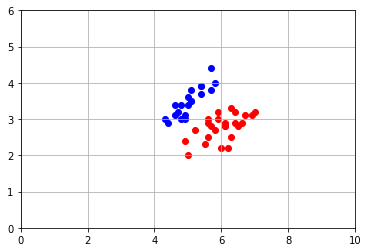

In [6]:
### visualize data ###

plt.axis([0, 10, 0, 6])
plt.grid()
for i in range(len(data_norm)) :
    point = data_norm[i]
    color = "r"
    if point[2] == 0 :
        color = "b"
    plt.scatter(point[0], point[1], c=color)

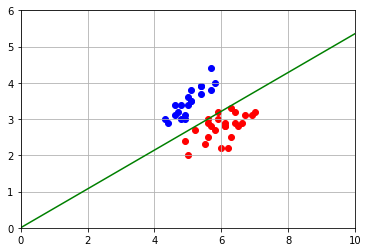

In [7]:
### training loop ###

learning_rate = 1

# initialize weights and bias
w1 = np.random.randn()
w2 = np.random.randn()
b = 0

fig = plt.figure()

# learn weights
for i in range(100) :
    ri = np.random.randint(len(data_norm))
    point = data_norm[ri]
    
    if ((point[2]==1) and (w1*point[0]+w2*point[1]+b<0)):
        w1, w2 = w1 + learning_rate*point[0], w2 + learning_rate*point[1] 

        
    if ((point[2]==0) and (w1*point[0]+w2*point[1]+b>0)):
        w1, w2 = w1 - learning_rate*point[0], w2 - learning_rate*point[1]
        
    # plotting the separation line
    plot_border(-w1/w2, -b/w2, data_norm, fig)
    display.clear_output(wait=True)
    time.sleep(0.05)

# plotting the final separation line
plot_border(-w1/w2, -b/w2, data_norm, fig)


In [8]:
### prediction on test data ###

test_data = [[ 5.4,  3.4,  0. ],
           [ 4.6,  3.6,  0. ],
           [ 5.1,  3.3,  0. ],
           [ 4.8,  3.4,  0. ],
           [ 5. ,  3. ,  0. ],
           [ 5. ,  3.4,  0. ],
           [ 5.2,  3.5,  0. ],
           [ 5.2,  3.4,  0. ],
           [ 4.7,  3.2,  0. ],
           [ 4.8,  3.1,  0. ],
           [ 5.4,  3.4,  0. ],
           [ 5.2,  4.1,  0. ],
           [ 5.5,  4.2,  0. ],
           [ 4.9,  3.1,  0. ],
           [ 5. ,  3.2,  0. ],
           [ 5.5,  3.5,  0. ],
           [ 4.9,  3.1,  0. ],
           [ 4.4,  3. ,  0. ],
           [ 5.1,  3.4,  0. ],
           [ 5. ,  3.5,  0. ],
           [ 4.5,  2.3,  0. ],
           [ 4.4,  3.2,  0. ],
           [ 5. ,  3.5,  0. ],
           [ 5.1,  3.8,  0. ],
           [ 4.8,  3. ,  0. ],
           [ 5.1,  3.8,  0. ],
           [ 4.6,  3.2,  0. ],
           [ 5.3,  3.7,  0. ],
           [ 5. ,  3.3,  0. ],
           [ 6.8,  2.8,  1. ],
           [ 6.7,  3. ,  1. ],
           [ 6. ,  2.9,  1. ],
           [ 5.7,  2.6,  1. ],
           [ 5.5,  2.4,  1. ],
           [ 5.5,  2.4,  1. ],
           [ 5.8,  2.7,  1. ],
           [ 6. ,  2.7,  1. ],
           [ 5.4,  3. ,  1. ],
           [ 6. ,  3.4,  1. ],
           [ 6.7,  3.1,  1. ],
           [ 6.3,  2.3,  1. ],
           [ 5.6,  3. ,  1. ],
           [ 5.5,  2.5,  1. ],
           [ 5.5,  2.6,  1. ],
           [ 6.1,  3. ,  1. ],
           [ 5.8,  2.6,  1. ],
           [ 5. ,  2.3,  1. ],
           [ 5.6,  2.7,  1. ],
           [ 5.7,  3. ,  1. ],
           [ 5.7,  2.9,  1. ],
           [ 6.2,  2.9,  1. ],
           [ 5.1,  2.5,  1. ],
           [ 5.7,  2.8,  1. ]]

for i in range(len(test_data)):
    point = test_data[i]
    print(point)   
    guess_flower(point[0], point[1])


[5.4, 3.4, 0.0]
Iris-setosa
[4.6, 3.6, 0.0]
Iris-setosa
[5.1, 3.3, 0.0]
Iris-setosa
[4.8, 3.4, 0.0]
Iris-setosa
[5.0, 3.0, 0.0]
Iris-setosa
[5.0, 3.4, 0.0]
Iris-setosa
[5.2, 3.5, 0.0]
Iris-setosa
[5.2, 3.4, 0.0]
Iris-setosa
[4.7, 3.2, 0.0]
Iris-setosa
[4.8, 3.1, 0.0]
Iris-setosa
[5.4, 3.4, 0.0]
Iris-setosa
[5.2, 4.1, 0.0]
Iris-setosa
[5.5, 4.2, 0.0]
Iris-setosa
[4.9, 3.1, 0.0]
Iris-setosa
[5.0, 3.2, 0.0]
Iris-setosa
[5.5, 3.5, 0.0]
Iris-setosa
[4.9, 3.1, 0.0]
Iris-setosa
[4.4, 3.0, 0.0]
Iris-setosa
[5.1, 3.4, 0.0]
Iris-setosa
[5.0, 3.5, 0.0]
Iris-setosa
[4.5, 2.3, 0.0]
Iris-versicolor
[4.4, 3.2, 0.0]
Iris-setosa
[5.0, 3.5, 0.0]
Iris-setosa
[5.1, 3.8, 0.0]
Iris-setosa
[4.8, 3.0, 0.0]
Iris-setosa
[5.1, 3.8, 0.0]
Iris-setosa
[4.6, 3.2, 0.0]
Iris-setosa
[5.3, 3.7, 0.0]
Iris-setosa
[5.0, 3.3, 0.0]
Iris-setosa
[6.8, 2.8, 1.0]
Iris-versicolor
[6.7, 3.0, 1.0]
Iris-versicolor
[6.0, 2.9, 1.0]
Iris-versicolor
[5.7, 2.6, 1.0]
Iris-versicolor
[5.5, 2.4, 1.0]
Iris-versicolor
[5.5, 2.4, 1.0]
Iris-ver

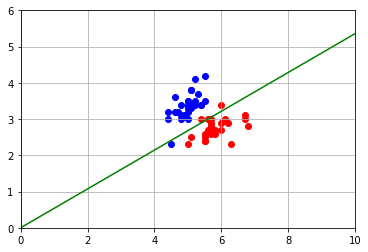

In [9]:
### visualize result ###
fig2 = plt.figure()
plot_border(-w1/w2, -b/w2, test_data, fig2)